In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

print(len(X_train),len(X_test))

7500 2500


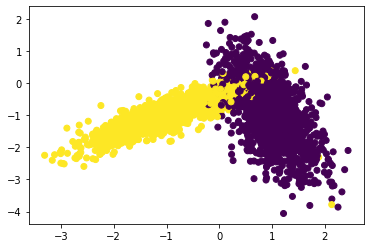

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]


parameters:  [1, 4, 7, 8, 10, 19, 20, 27, 39, 43]
trainscores:  [1.0, 0.9624666666666667, 0.9608, 0.9604666666666667, 0.9595333333333333, 0.9571333333333333, 0.9568666666666666, 0.9573999999999999, 0.9579333333333334, 0.9580666666666667]
testscores:  [0.9296000000000001, 0.9505333333333335, 0.9518666666666666, 0.9523999999999999, 0.9526666666666667, 0.9541333333333334, 0.9540000000000001, 0.9538666666666668, 0.9556, 0.9564]
best value of N: 43


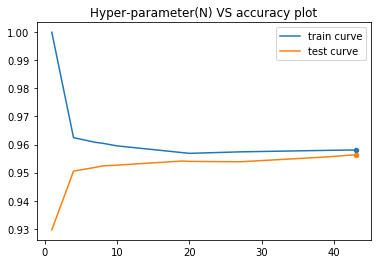

In [9]:
import random 
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

def RandomSerachCV(x_train, y_train, classifier, p_range, folds):
    train_scores=[]
    test_scores=[] 
    #random selction from range
    para_li= random.sample(range(1, p_range),10)
    para_li.sort()
    #print(para_li)
    for k in tqdm(para_li):
        trainscr_fold=[]
        testscr_fold=[]
        #print(folds)
        for j in range(0, folds):
            Values = (len(x_train)/ (folds))#len
            boundary = int(Values)#type casting
            test_indices=list(set(list(range((boundary*j), (boundary*(j+1))))))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            #print("test:",test_indices)
            #move points in sets with the help of indices
            #swapping
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors=k
            classifier.fit(X_train,Y_train)
            Y_predicted=classifier.predict(X_test)
            testscr_fold.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted=classifier.predict(X_train)
            trainscr_fold.append(accuracy_score(Y_train, Y_predicted))
        train_scores.append(np.mean(np.array(trainscr_fold)))#appending train score
        test_scores.append(np.mean(np.array(testscr_fold)))#appending test score
    return train_scores,test_scores,para_li


kn = KNeighborsClassifier()
p_range = 50
folds = 3

train_score,cv_scores,param=RandomSerachCV(X_train, y_train, kn, p_range, folds)
print("parameters: ",param)
print("trainscores: ",train_score)
print("testscores: ",cv_scores)
diff=[]
for i in range(len(para)):
    diff.append((train_score[i]-cv_scores[i]))
index=diff.index(min(diff))
print("best value of N:",param[index])
plt.scatter(param[index],train_score[index],s=20)
plt.scatter(param[index],cv_scores[index],s=20)
plt.plot(param,train_score, label='train curve')
plt.plot(param,cv_scores, label='test curve')
plt.title('Hyper-parameter(N) VS accuracy plot')
plt.legend()
plt.show()



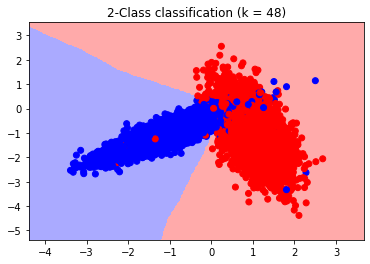

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
neigh = KNeighborsClassifier(n_neighbors = para[index])
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)